In [ ]:
!unzip fashion-mnist-master.zip

Archive:  fashion-mnist-master.zip
b2617bb6d3ffa2e429640350f613e3291e10b141
   creating: fashion-mnist-master/
  inflating: fashion-mnist-master/.catwatch.yaml  
 extracting: fashion-mnist-master/.dockerignore  
  inflating: fashion-mnist-master/.gitignore  
  inflating: fashion-mnist-master/.zappr.yaml  
  inflating: fashion-mnist-master/CONTRIBUTING.md  
  inflating: fashion-mnist-master/Dockerfile  
  inflating: fashion-mnist-master/LICENSE  
  inflating: fashion-mnist-master/MAINTAINERS  
  inflating: fashion-mnist-master/README.ja.md  
  inflating: fashion-mnist-master/README.md  
  inflating: fashion-mnist-master/README.zh-CN.md  
  inflating: fashion-mnist-master/app.py  
   creating: fashion-mnist-master/benchmark/
 extracting: fashion-mnist-master/benchmark/__init__.py  
  inflating: fashion-mnist-master/benchmark/baselines.json  
  inflating: fashion-mnist-master/benchmark/convnet.py  
  inflating: fashion-mnist-master/benchmark/runner.py  
  inflating: fashion-mnist-master/c

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

# 1. Load the Dataset and 2. Data Preprocessing

# Define a transform to normalize the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
full_train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)

# Split the training data into training and validation sets
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Download and load the test data
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the class names
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.41MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 110kB/s]
100%|██████████| 4.42M/4.42M [00:02<00:00, 1.83MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.6MB/s]

Number of training samples: 48000
Number of validation samples: 12000
Number of test samples: 10000


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# a) Artificial Neural Network (ANN/MLP)
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

ann_model = ANN()
print(ann_model)

ANN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim

# a) Training the ANN
criterion = nn.CrossEntropyLoss()
optimizer_ann = optim.Adam(ann_model.parameters(), lr=0.001)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in val_loader:
                images, labels = data
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Training Loss: {running_loss / len(train_loader):.4f}, '
              f'Validation Loss: {val_loss / len(val_loader):.4f}, '
              f'Validation Accuracy: {100 * correct / total:.2f}%')

print("Training the ANN...")
train_model(ann_model, train_loader, val_loader, criterion, optimizer_ann)
print("Finished Training the ANN.")

Training the ANN...
Epoch 1/10, Training Loss: 0.5371, Validation Loss: 0.4430, Validation Accuracy: 84.12%
Epoch 2/10, Training Loss: 0.3926, Validation Loss: 0.4113, Validation Accuracy: 84.66%
Epoch 3/10, Training Loss: 0.3513, Validation Loss: 0.3646, Validation Accuracy: 86.48%
Epoch 4/10, Training Loss: 0.3237, Validation Loss: 0.3608, Validation Accuracy: 86.78%
Epoch 5/10, Training Loss: 0.3046, Validation Loss: 0.3636, Validation Accuracy: 86.83%
Epoch 6/10, Training Loss: 0.2877, Validation Loss: 0.3422, Validation Accuracy: 87.92%
Epoch 7/10, Training Loss: 0.2758, Validation Loss: 0.3309, Validation Accuracy: 88.26%
Epoch 8/10, Training Loss: 0.2619, Validation Loss: 0.3161, Validation Accuracy: 88.64%
Epoch 9/10, Training Loss: 0.2525, Validation Loss: 0.3235, Validation Accuracy: 88.53%
Epoch 10/10, Training Loss: 0.2423, Validation Loss: 0.3483, Validation Accuracy: 87.85%
Finished Training the ANN.


In [ ]:
# b) Convolutional Neural Network (CNN)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn_model = CNN()
print(cnn_model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# b) Training the CNN
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.001)

print("\nTraining the CNN...")
train_model(cnn_model, train_loader, val_loader, criterion, optimizer_cnn)
print("Finished Training the CNN.")


Training the CNN...
Epoch 1/10, Training Loss: 0.4990, Validation Loss: 0.3602, Validation Accuracy: 87.26%
Epoch 2/10, Training Loss: 0.3248, Validation Loss: 0.3082, Validation Accuracy: 88.70%
Epoch 3/10, Training Loss: 0.2725, Validation Loss: 0.2796, Validation Accuracy: 89.85%
Epoch 4/10, Training Loss: 0.2420, Validation Loss: 0.2632, Validation Accuracy: 90.42%
Epoch 5/10, Training Loss: 0.2147, Validation Loss: 0.2593, Validation Accuracy: 90.85%
Epoch 6/10, Training Loss: 0.1950, Validation Loss: 0.2576, Validation Accuracy: 90.65%
Epoch 7/10, Training Loss: 0.1746, Validation Loss: 0.2549, Validation Accuracy: 90.58%
Epoch 8/10, Training Loss: 0.1563, Validation Loss: 0.2773, Validation Accuracy: 90.42%
Epoch 9/10, Training Loss: 0.1407, Validation Loss: 0.2743, Validation Accuracy: 91.09%
Epoch 10/10, Training Loss: 0.1249, Validation Loss: 0.2734, Validation Accuracy: 91.17%
Finished Training the CNN.



Evaluating the ANN...
Accuracy of the network on the 10000 test images: 87.43 %


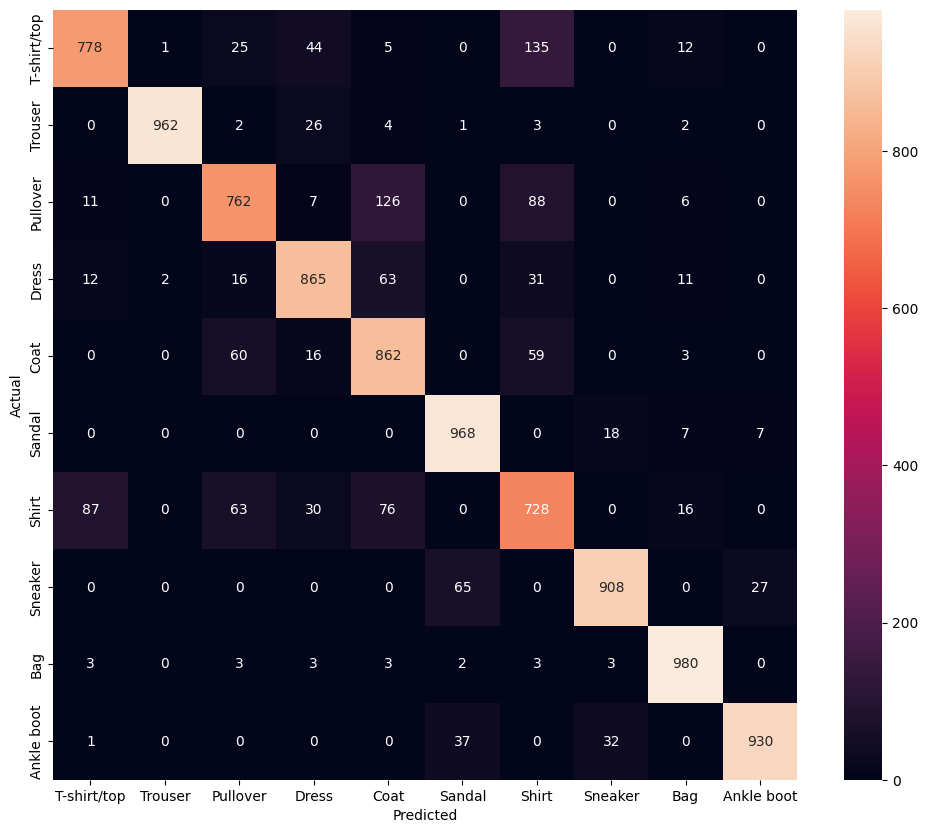


Evaluating the CNN...
Accuracy of the network on the 10000 test images: 90.89 %


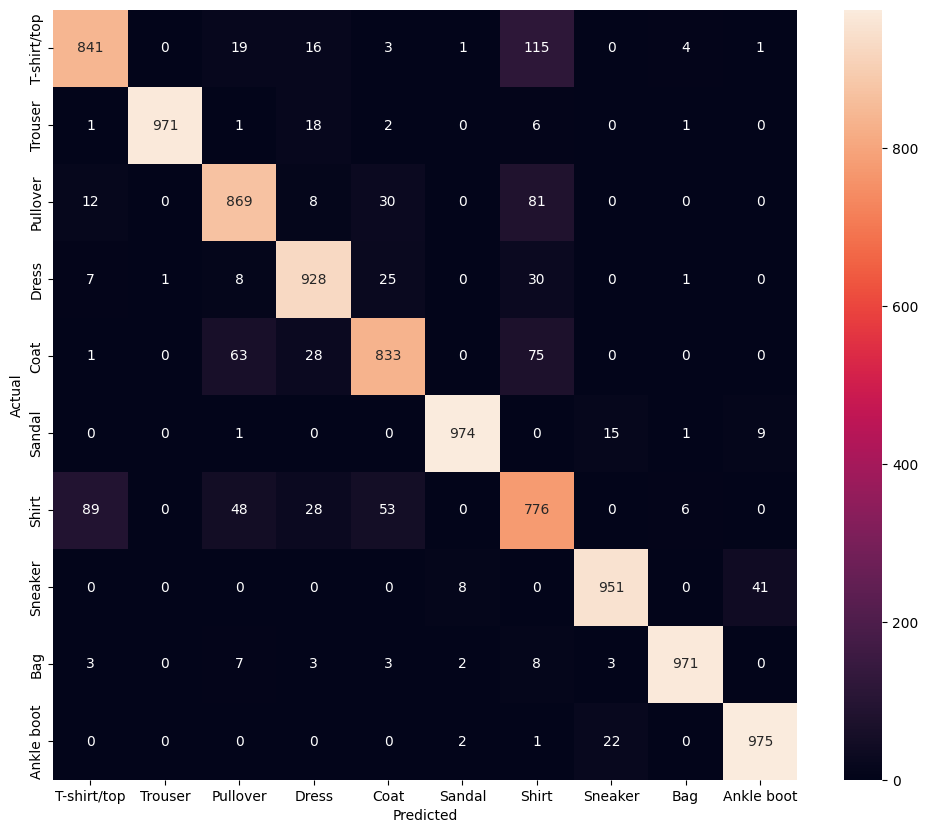

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    y_pred = []
    y_true = []
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f} %')

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index = [i for i in classes],
                         columns = [i for i in classes])
    plt.figure(figsize = (12,10))
    sn.heatmap(df_cm, annot=True, fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

print("\nEvaluating the ANN...")
evaluate_model(ann_model, test_loader)

print("\nEvaluating the CNN...")
evaluate_model(cnn_model, test_loader)

In [ ]:
#Enhanced Code of CNN


import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

# Define transformations for training (with augmentation) and testing (no augmentation)
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(), # Randomly flip the image horizontally
    transforms.RandomRotation(10),     # Randomly rotate the image by 10 degrees
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
full_train_dataset_aug = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                                          download=True, transform=transform_train)

# We need to apply the test transform to the validation set
# So we download it again without augmentation to split it
temp_train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                                       download=True, transform=transform_test)


# Split the data into training and validation sets
train_size = int(0.8 * len(full_train_dataset_aug))
val_size = len(full_train_dataset_aug) - train_size

# Use the augmented dataset for training
train_dataset_aug, _ = random_split(full_train_dataset_aug, [train_size, val_size])
# Use the non-augmented dataset for validation
_, val_dataset_no_aug = random_split(temp_train_dataset, [train_size, val_size])


# Download and load the test data
test_dataset_aug = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                                    download=True, transform=transform_test)

# Create data loaders
train_loader_aug = DataLoader(train_dataset_aug, batch_size=64, shuffle=True)
val_loader_aug = DataLoader(val_dataset_no_aug, batch_size=64, shuffle=False)
test_loader_aug = DataLoader(test_dataset_aug, batch_size=64, shuffle=False)

# Define the class names
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

print("Data loaded and augmented.")

Data loaded and augmented.


In [ ]:
# Improved CNN with Batch Normalization and Dropout
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        # Convolutional Block 1
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        # Convolutional Block 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        # Max-pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Dropout layer
        self.dropout = nn.Dropout(0.25)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Pass through Conv1, BatchNorm, ReLU, and Pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        # Pass through Conv2, BatchNorm, ReLU, and Pooling
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 64 * 7 * 7)
        # Apply dropout
        x = self.dropout(x)
        # Pass through the first fully connected layer
        x = F.relu(self.fc1(x))
        # Apply dropout again before the final layer
        x = self.dropout(x)
        # Pass through the final output layer
        x = self.fc2(x)
        return x

improved_cnn_model = ImprovedCNN()
print(improved_cnn_model)

ImprovedCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
def train_improved_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in val_loader:
                images, labels = data
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Step the scheduler
        scheduler.step()

        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Training Loss: {running_loss / len(train_loader):.4f}, '
              f'Validation Loss: {val_loss / len(val_loader):.4f}, '
              f'Validation Accuracy: {100 * correct / total:.2f}%')


# Define loss, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer_improved = optim.Adam(improved_cnn_model.parameters(), lr=0.001)
# Scheduler will decrease LR by a factor of 0.1 every 7 epochs
scheduler = StepLR(optimizer_improved, step_size=7, gamma=0.1)

print("\nTraining the Improved CNN...")
train_improved_model(improved_cnn_model, train_loader_aug, val_loader_aug, criterion, optimizer_improved, scheduler, num_epochs=20)
print("Finished Training the Improved CNN.")


Training the Improved CNN...
Epoch 1/20, Training Loss: 0.5503, Validation Loss: 0.3413, Validation Accuracy: 87.28%
Epoch 2/20, Training Loss: 0.4016, Validation Loss: 0.2981, Validation Accuracy: 88.70%
Epoch 3/20, Training Loss: 0.3637, Validation Loss: 0.2700, Validation Accuracy: 89.83%
Epoch 4/20, Training Loss: 0.3413, Validation Loss: 0.2453, Validation Accuracy: 90.73%
Epoch 5/20, Training Loss: 0.3213, Validation Loss: 0.2494, Validation Accuracy: 90.83%
Epoch 6/20, Training Loss: 0.3052, Validation Loss: 0.2267, Validation Accuracy: 91.81%
Epoch 7/20, Training Loss: 0.2963, Validation Loss: 0.2237, Validation Accuracy: 91.81%
Epoch 8/20, Training Loss: 0.2603, Validation Loss: 0.1932, Validation Accuracy: 93.04%
Epoch 9/20, Training Loss: 0.2528, Validation Loss: 0.1898, Validation Accuracy: 93.12%
Epoch 10/20, Training Loss: 0.2514, Validation Loss: 0.1882, Validation Accuracy: 93.19%
Epoch 11/20, Training Loss: 0.2467, Validation Loss: 0.1864, Validation Accuracy: 93.20%



Evaluating the Improved CNN...
Accuracy of the network on the 10000 test images: 91.55 %


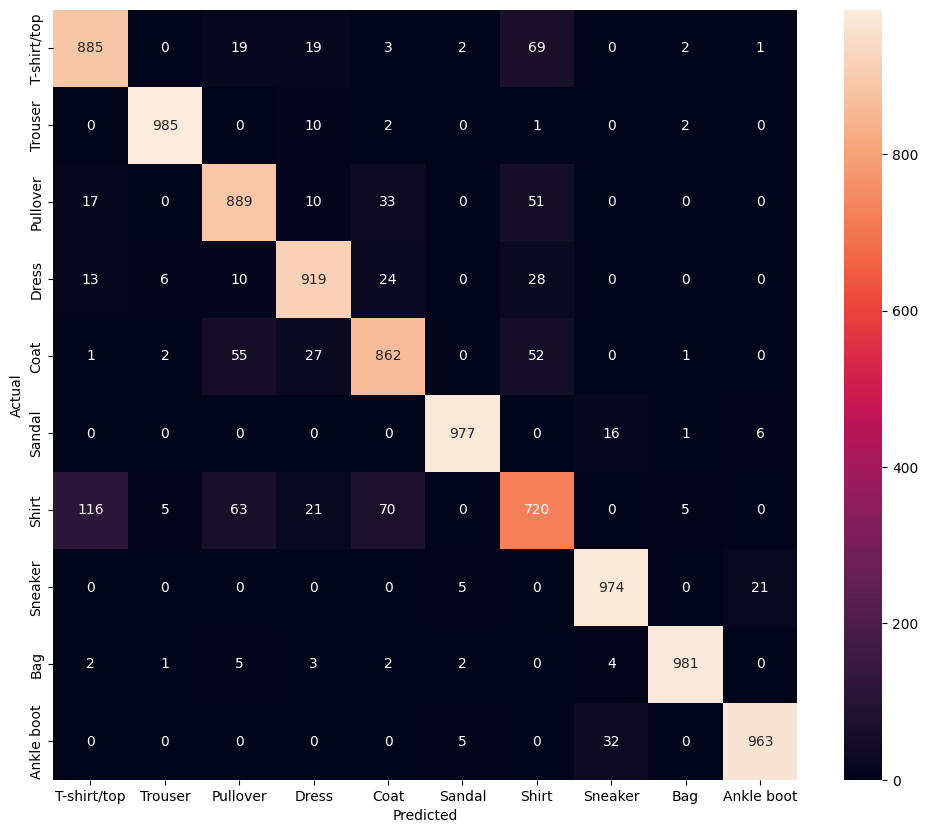

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    y_pred = []
    y_true = []
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f} %')

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index = [i for i in classes],
                         columns = [i for i in classes])
    plt.figure(figsize = (12,10))
    sn.heatmap(df_cm, annot=True, fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

print("\nEvaluating the Improved CNN...")
evaluate_model(improved_cnn_model, test_loader_aug)

In [ ]:
# Improved ANN with Batch Normalization and Dropout
class ImprovedANN(nn.Module):
    def __init__(self):
        super(ImprovedANN, self).__init__()
        # Input layer (28*28 = 784) to hidden layer 1 (256 neurons)
        self.fc1 = nn.Linear(28 * 28, 256)
        self.bn1 = nn.BatchNorm1d(256)
        # Hidden layer 1 to hidden layer 2 (128 neurons)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        # Hidden layer 2 to hidden layer 3 (64 neurons)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        # Hidden layer 3 to output layer (10 classes)
        self.fc4 = nn.Linear(64, 10)
        # Dropout layer with a 50% probability
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Flatten the image
        x = x.view(-1, 28 * 28)
        # Pass through Layer 1
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        # Pass through Layer 2
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        # Pass through Layer 3
        x = F.relu(self.bn3(self.fc3(x)))
        # Output Layer (no activation, as CrossEntropyLoss will apply it)
        x = self.fc4(x)
        return x

improved_ann_model = ImprovedANN()
print(improved_ann_model)



ImprovedANN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [ ]:
def train_improved_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in val_loader:
                images, labels = data
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Step the scheduler
        scheduler.step()

        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Training Loss: {running_loss / len(train_loader):.4f}, '
              f'Validation Loss: {val_loss / len(val_loader):.4f}, '
              f'Validation Accuracy: {100 * correct / total:.2f}%')

# Define loss, optimizer, and scheduler for the ANN
criterion_ann = nn.CrossEntropyLoss()
optimizer_ann_improved = optim.Adam(improved_ann_model.parameters(), lr=0.001)
scheduler_ann = StepLR(optimizer_ann_improved, step_size=7, gamma=0.1)

print("\nTraining the Improved ANN...")
train_improved_model(improved_ann_model, train_loader_aug, val_loader_aug, criterion_ann, optimizer_ann_improved, scheduler_ann, num_epochs=20)
print("Finished Training the Improved ANN.")


Training the Improved ANN...
Epoch 1/20, Training Loss: 0.4718, Validation Loss: 0.3571, Validation Accuracy: 86.71%
Epoch 2/20, Training Loss: 0.4626, Validation Loss: 0.3542, Validation Accuracy: 87.15%
Epoch 3/20, Training Loss: 0.4599, Validation Loss: 0.3541, Validation Accuracy: 86.67%
Epoch 4/20, Training Loss: 0.4552, Validation Loss: 0.3520, Validation Accuracy: 87.10%
Epoch 5/20, Training Loss: 0.4522, Validation Loss: 0.3436, Validation Accuracy: 87.22%
Epoch 6/20, Training Loss: 0.4470, Validation Loss: 0.3391, Validation Accuracy: 87.38%
Epoch 7/20, Training Loss: 0.4421, Validation Loss: 0.3387, Validation Accuracy: 87.50%
Epoch 8/20, Training Loss: 0.4217, Validation Loss: 0.3233, Validation Accuracy: 88.09%
Epoch 9/20, Training Loss: 0.4138, Validation Loss: 0.3208, Validation Accuracy: 88.13%
Epoch 10/20, Training Loss: 0.4094, Validation Loss: 0.3167, Validation Accuracy: 88.21%
Epoch 11/20, Training Loss: 0.4034, Validation Loss: 0.3157, Validation Accuracy: 88.29%



Evaluating the Improved ANN...
Accuracy of the network on the 10000 test images: 87.35 %


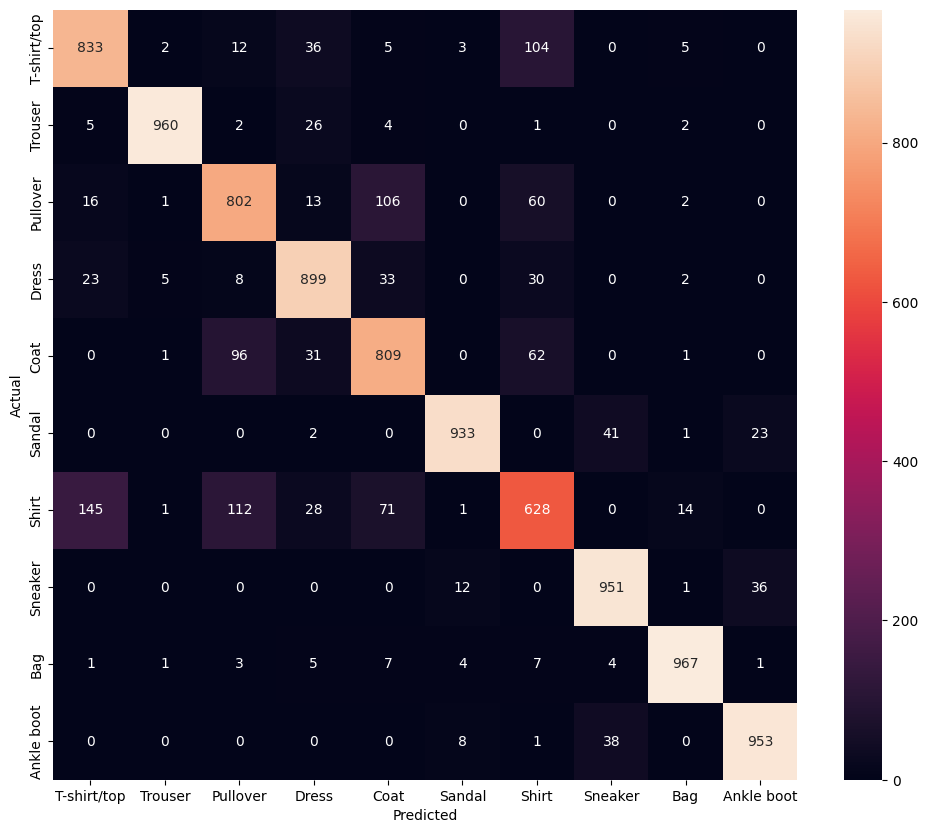

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    y_pred = []
    y_true = []
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f} %')

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index = [i for i in classes],
                         columns = [i for i in classes])
    plt.figure(figsize = (12,10))
    sn.heatmap(df_cm, annot=True, fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

print("\nEvaluating the Improved ANN...")
evaluate_model(improved_ann_model, test_loader_aug)

In [ ]:
# Best validation accuracies achieved during training

best_ann_val_accuracy = 88.64
best_cnn_val_accuracy = 91.17
best_improved_ann_val_accuracy = 88.53
best_improved_cnn_val_accuracy = 93.62

print(f"Original ANN Best Validation Accuracy: {best_ann_val_accuracy}%")
print(f"Original CNN Best Validation Accuracy: {best_cnn_val_accuracy}%")
print(f"Improved ANN Best Validation Accuracy: {best_improved_ann_val_accuracy}%")
print(f"Improved CNN Best Validation Accuracy: {best_improved_cnn_val_accuracy}%")

Original ANN Best Validation Accuracy: 88.64%
Original CNN Best Validation Accuracy: 91.17%
Improved ANN Best Validation Accuracy: 88.53%
Improved CNN Best Validation Accuracy: 93.62%
